## FILL IN YOUR NAME AND UTORID HERE

Python Assignment 2: A simple stellar model
==========================================================

## Before you begin

Assuming you have loaded this file into your Jupyter Notebooks workspace, make sure to press the "play" button at the top of the page in each box. This will render the Markdown into nicely-formatted text and execute all of the sections of Python code. You can also hit "shift"+"enter" for the same result.

You will need to upload the text file "bs05_agsop.txt' to your syzygy folder or wherever you are running your jupyter notebook.

## Introduction

This Jupyter Notebook will serve as the template for your Python 2 assignment. You will be working through the content it contains and then filling in your own work in the spaces provided. There are detailed instructions on how to prepare your assignment available on Quercus. Make sure you consult those instructions.

In this notebook, you will use the theoretical equations you derived for density, pressure, and temperature as a function of radius given our simple density model. You will read in values for $r$, $\rho$, $P$, and $T$ that were derived from a full stellar model, and see how well we are able to reproduce the full stellar model with a simple approximation for the density.

## PART 1: Read in the full stellar model data

Follow the method in Python 1 to read in the needed columns from the stellar model data file. You will need to set the following parameters in np.loadtxt: usecols, skiprows. Be sure to set unpack = True. Most error messages stem from incorrect mapping of parameters to columns, or an incorrect number of rows at the top of the file to skip. (Other issues include unclosed brackets and the like, so check your lines carefully!)

Open the file in your favourite text editor (or in syzygy) to figure out which columns you will need and understand their units.

In [1]:
# QUESTION 1: (1 point) Read in the full stellar model data by modifying the code below
# Import the needed packages
import numpy as np

# Change these array names to something more useful
# Modify the filename
# Modify the skiprows and usecols to read the correct column to the corresponding array
# I will load all columns
mnorm, rnorm, T, rho, P, Lnorm, X, Y, He3, C12, N14, O16 = np.loadtxt("bs05_agsop.txt",skiprows=26,usecols=np.arange(0,12),unpack=True)

# Modify the print statement below to print out the first ten values of r and density

print('First ten values of R/Rsun: '+ str(rnorm[:10]))
print('First ten values of rho: ' + str(rho[:10]))


First ten values of R/Rsun: [0.00161 0.00172 0.00182 0.00191 0.002   0.00208 0.00215 0.00222 0.00228
 0.00235]
First ten values of rho: [150.5 150.5 150.5 150.5 150.4 150.4 150.4 150.4 150.4 150.4]


The units for the pressure in this file are dyne/cm$^2$. The units for temperature are K. The units for density are g/cm$^3$. You can either perform your calculations below in cgs to obtain the correct units, or you can convert the values in the stellar model to SI.

1 dyne = 1 g cm/s$^2$

1 dyne/cm$^2$ = 1 N/m$^2$ = 0.1 Pa

1 g/cm$^3$ = 1000 kg/m$^3$

If you prefer to convert the stellar model data into SI units, do so in the next step.

## Part 2: Calculate the stellar parameters as a function of radius from the simple stellar model
From your simple stellar model, we have equations for $\rho(r)$, $m(r)$, $P(r)$, and $T(r)$. Note that your equations all have terms in $r/R$, rather than just $r$. In the complete stellar model data, the radius is normalized and therefore also given in $r/R$. The means that we can use the normalized radius array as an input to calculate our values of the stellar parameters as a function of radius.

Python is very useful for doing calculations like this, where we can use an array in $r$ to calculate $\rho(r)$ at every $r$ in the array.

Some of the mathematical operators you will need:

x to the power of y = x**y

square root of a number = np.sqrt{number} or number**(1/2)

x times y = x\* y

x divided by y = x/y

Recall the order of operations - python will perform brackets, exponents, division and multiplication, addition and subtraction in that order! So use brackets to ensure your calculations are performed the way you want them to be done.

When doing calculations, it is much easier to set variables for the constants you will use frequently. This allows you to see more clearly what parameters you are using in your calculations. Then when doing mathematical operations, you can use those variables in place of the numbers. As an example, run the cell below:

In [2]:
# Example of calculations with variables
a = 5
b = 7

# Make a new variable that multiplies the first two together:
c = a*b

# This is another way of including results in a print statement. Within the curly brackets {},
# the number gives the index of the list in 'format' to print in that location.
print('{0} x {1} = {2}'.format(a,b,c))

5 x 7 = 35


To practice doing calculations, set up your constants and calculate your value for $\rho_c$ in the block below.

You can also use the astropy package, which includes libraries of constants and units. If you're careful to include the correct units for all your variables and constants, you can also use astropy to convert between units in your final answer. See more documentation here:

[astropy units](https://docs.astropy.org/en/stable/units/)

[astropy_constants](https://docs.astropy.org/en/stable/constants/index.html)

In [3]:
# QUESTION 2 (2 points)
# Set up constants, e.g. M_Sun, R_Sun, etc.
# numpy already has pi defined as np.pi
# If you want to try astropy units and constants, you need to import the libraries:
import astropy.constants as c
import astropy.units as u

# Here setting mu 0.61 for the Sun, where mu = the mean particle mass
mu = 0.61
# Set up your own constants here. Add a comment for each that shows units.

# mass of hydrogen (Carroll & Ostlie, APPENDIXA 2018)
m_h = u.Quantity(1.673532499*10**(-27),u.kg)

# Calculate rho_c. Be sure to use reasonable and consistent units!
rho_c = 3*c.M_sun/np.pi/(c.R_sun)**3

# Since I'm using astropy.constants, it will print the units [kg/m**3]
print('My rho_c = '+str(rho_c))

# If you are converting the solar model data to different units, do so here:
# (You can make new arrays, i.e., array1_new = array1 * factor,
# or simply say array1 = array1 * factor. Probably one of these is better in terms of
# proper coding practice, but do what works for you.)

#Convert the unit of P to SI [Pa]:
P_SI = u.Quantity(P*0.1, unit=u.Pa)
print('First ten values of P_SI: '+ str(P_SI[:10]))

#Convert the unit of rho to kg/m**3
rho_SI = u.Quantity(rho*1000, unit=u.kg/u.m/u.m/u.m)
print('First ten values of rho_SI: '+ str(rho_SI[:10]))





My rho_c = 5639.119297230102 kg / m3
First ten values of P_SI: [2.338e+16 2.338e+16 2.338e+16 2.338e+16 2.338e+16 2.338e+16 2.338e+16
 2.338e+16 2.338e+16 2.338e+16] Pa
First ten values of rho_SI: [150500. 150500. 150500. 150500. 150400. 150400. 150400. 150400. 150400.
 150400.] kg / m3


So our equation for $\rho(r) = \rho_c * (1-r/R)$. Since our radius array is normalized, we can rewrite this as $\rho(x) = \rho_c * (1-x)$. Once you've calculated $\rho_c$, run the block below to see how we can create an array for $\rho(r)$ in python.

[5630.04031516 5629.42001204 5628.85610011 5628.34857937 5627.84105864
 5627.38992909 5626.99519074 5626.60045239 5626.26210523] kg / m3


Text(0, 0.5, 'Density (kg/m^3)')

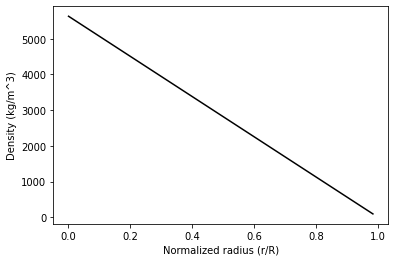

In [4]:
# Use the equation for density in your simple stellar model to calculate rho(r)
# Here I'm just reloading the normalized radius (r/R) column so you don't have to edit the cell.
rnorm = np.loadtxt('bs05_agsop.txt', skiprows=26, unpack=True, usecols=(1))

# By multiplying rho_c by the rnorm array, we create an array in my_rho_r
my_rho_r = rho_c * (1 - rnorm)

# Print the first ten values to show you have an array!
print(my_rho_r[0:9])

# Plot the density as a function of radius, see that it's linear!
# First, we need to import the matplotlib.pyplot library
import matplotlib.pyplot as plt
import matplotlib
# This command allows your plots to show up below your code in your Jupyter notebook
%matplotlib inline

# Create a figure to plot in. Inside the brackets, you can set things like figsize=(6,4),
# or the dpi (dots per inch).
fig=plt.figure()

plt.plot(rnorm, my_rho_r, color='black')

# Always add axis labels! Include units when needed.
plt.xlabel('Normalized radius (r/R)')
plt.ylabel('Density (kg/m^3)') # NOTE: Modify units here if you are not using cgs!

In [5]:
# QUESTION 3: (2 points) Make arrays for P and T as a function of r/R
# Follow the method for density, and use the normalized radius for your r/R terms
# Watch units!

my_press = np.pi*c.G*rho_SI**2*c.R_sun**2*(5/36-2/3*rnorm**2+7/9*rnorm**3-1/4*rnorm**4)

my_temp = np.pi*c.G*rho_SI*c.R_sun**2*mu*m_h/c.k_B/(1-rnorm)
my_temp *= 5/36 - 2/3*rnorm**2+7/9*rnorm**3-1/4*rnorm**4
# Print the first 10 values for your pressure and temperature arrays:

print('First ten values of pressure: '+ str(my_press[0:10]))

print('First ten values of temperature: '+ str(my_temp[0:10]))


First ten values of pressure: [3.19252799e+17 3.19252239e+17 3.19251698e+17 3.19251185e+17
 3.18826536e+17 3.18826038e+17 3.18825586e+17 3.18825120e+17
 3.18824708e+17 3.18824214e+17] kg / (m s2)
First ten values of temperature: [1.57100907e+08 1.57117943e+08 1.57133417e+08 1.57147334e+08
 1.57056815e+08 1.57069160e+08 1.57079956e+08 1.57090747e+08
 1.57099991e+08 1.57110770e+08] K kg m2 / (J s2)


## Part 3: Plot your results and compare with the full stellar model

In the next three cells, create a plot for each of your density, pressure, and temperature models as a function of the normalized radius. Plot your derived values with black lines. Be sure to label your axes.

In the same figure, plot the full solar model results with red lines.

Make both x and y axes in log scale.

The above plot for density is filled in the first cell to get you started.

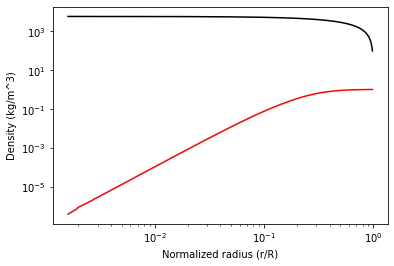

In [6]:
# QUESTION 4: (1 point) Plot density

fig=plt.figure()

plt.plot(rnorm, my_rho_r, color='black')

# Always add axis labels! Include units when needed.
plt.xlabel('Normalized radius (r/R)')
plt.ylabel('Density (kg/m^3)')

# Add the standard model here, make sure you edit 'array1' to what you named the solar model
# array for density
plt.plot(rnorm, mnorm, color='red')

# Log axes
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'Pressure (kg/m^2)')

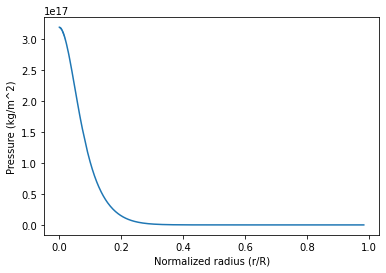

In [7]:
# QUESTION 5: (2 points) Plot pressure
fig=plt.figure()
plt.plot(rnorm, my_press)
plt.xlabel('Normalized radius (r/R)')
plt.ylabel('Pressure (kg/m^2)')

Text(0, 0.5, 'Temperature (K)')

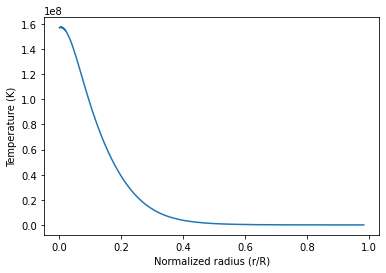

In [8]:
# QUESTION 6: (2 points) Plot temperature
fig=plt.figure()
plt.plot(rnorm, my_temp)
plt.xlabel('Normalized radius (r/R)')
plt.ylabel('Temperature (K)')

While our results aren't perfect, you will hopefully find that we are generally within an order of magnitude of the solar model, which is impressive considering we are not including energy generation, opacity, etc.!
## Reference
Williams, D. R. (2018, February 23). Sun fact sheet. NASA. Retrieved October 26, 2021, from https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html.